In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import statsmodels.api as sm
from statsmodels.formula.api import ols
from scipy import stats
from scipy.stats import spearmanr,pearsonr,chi2_contingency
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Put the dataset which comes from short_dataset_feature_engineering.ipynb 
file_path = '/data/caysar9/results/final_short.csv'
# Load migraine data
print("Loading data...")
df = pd.read_csv(file_path)
df.head()

Loading data...


,query_date,studyid,all_locations,all_triggers,all_relieves,all_aff,gender,age_group,duration_in_secs,painintensity,...,total_physical_activity,week,activity_group,sleep_group,sleep_duration_past_7_days,migraine_attacks_past7days,mean_migraine_duration_past7days,next_migraine_in_window,next_migraine_next_day,severe_migraine
0,2019-10-18,00018e9fba5d3a9c0955d9d314300c53753b2c80,Work,"menstrualcyclestatus:no,lack of sleep",stay indoor,"slower [at work],slower [at home],hard to conc...",F,45-54,24420.0,4.0,...,24.0,42,Sedentary,Adequate Sleep,8.352222,1.0,6.783333,1,1,0
1,2019-10-19,00018e9fba5d3a9c0955d9d314300c53753b2c80,Home,menstrualcyclestatus:no,no relief,not affected,F,45-54,20760.0,6.0,...,41.0,42,Sedentary,Adequate Sleep,8.508333,2.0,6.275000,1,0,0
2,2019-10-21,00018e9fba5d3a9c0955d9d314300c53753b2c80,Home,"chocolate,aged cheese,skipped magnesium,menstr...","dark room rest,stay indoor,sleep","missed social activity,missed family time",F,45-54,16200.0,6.0,...,12.0,43,Sedentary,Adequate Sleep,7.834352,3.0,5.683333,0,0,0
3,2019-10-31,00018e9fba5d3a9c0955d9d314300c53753b2c80,Out,"lack of sleep,menstrualcyclestatus:yes",sleep,slower [at home],F,45-54,18000.0,8.0,...,41.0,44,Sedentary,Adequate Sleep,7.501736,4.0,5.512500,0,0,0
4,2019-10-26,000627f4b55415dbe41189b1312806a875bf5925,Bed (at Home),"very variable weather,temperature change,press...","caffeine,drink water,sun glasses,stay indoor,i...","missed family time,hard to concentrate,woke up...",F,35-44,86400.0,6.0,...,0.0,43,Sedentary,Excessive Sleep,9.133333,1.0,24.000000,0,0,0


In [3]:
# ANOVA for Migraine Duration by Age Group 
model_duration = ols('duration_in_hours ~ C(age_group)', data=df).fit()
anova_duration = sm.stats.anova_lm(model_duration, typ=2)
print("ANOVA for Migraine Duration by Age Group:")
print(anova_duration)

# ANOVA for Pain Intensity by Age Group
model_pain_intensity = ols('painintensity ~ C(age_group)', data=df).fit()
anova_pain_intensity = sm.stats.anova_lm(model_pain_intensity, typ=2)
print("\nANOVA for Pain Intensity by Age Group:")
print(anova_pain_intensity)

# ANOVA for Migraine days Per Month by Age Group
model_migraine_days_per_month = ols('migraine_days_per_month ~ C(age_group)', data=df).fit()
anova_migraine_days_per_month = sm.stats.anova_lm(model_migraine_days_per_month, typ=2)
print("\nANOVA for Migraine Per Month by Age Group:")
print(anova_migraine_days_per_month)


ANOVA for Migraine Duration by Age Group:
                     sum_sq       df          F        PR(>F)
C(age_group)    1838.535177      5.0  17.729076  1.468760e-17
Residual      298577.914399  14396.0        NaN           NaN

ANOVA for Pain Intensity by Age Group:
                    sum_sq       df         F   PR(>F)
C(age_group)     65.169533      5.0  3.508739  0.00359
Residual      53476.802982  14396.0       NaN      NaN

ANOVA for Migraine Per Month by Age Group:
                    sum_sq       df          F        PR(>F)
C(age_group)   1577.750961      5.0  53.382722  4.252030e-55
Residual      85096.083785  14396.0        NaN           NaN


In [4]:
# T-TEST FOR ACTIVITY GROUPS

dependent_vars = ['duration_in_hours', 'painintensity', 'migraine_days_per_month']
results = {}

# Separate groups
sedentary_data = df[df['activity_group'] == 'Sedentary'][dependent_vars]
active_data = df[df['activity_group'] == 'Active'][dependent_vars]

# Performing one-tailed t-tests 
for var in dependent_vars:
    t_stat, p_val = stats.ttest_ind(sedentary_data[var], active_data[var], alternative='greater', nan_policy='omit')
    results[var] = {
        'mean_sedentary': sedentary_data[var].mean(),
        'std_sedentary': sedentary_data[var].std(),
        'mean_active': active_data[var].mean(),
        'std_active': active_data[var].std(),
        't_statistic': t_stat,
        'p_value': p_val
    }

# Display the results
print("Results of One-Tailed T-Tests:")
for var, res in results.items():
    print(f"{var.capitalize()}:")
    print(f"  Mean (Sedentary): {res['mean_sedentary']} (Std: {res['std_sedentary']})")
    print(f"  Mean (Active): {res['mean_active']} (Std: {res['std_active']})")
    print(f"  T-statistic: {res['t_statistic']}")
    print(f"  P-value: {res['p_value']}")
    print()


Results of One-Tailed T-Tests:
Duration_in_hours:
  Mean (Sedentary): 9.945644267371836 (Std: 4.569218208813423)
  Mean (Active): 9.29032634032634 (Std: 4.445427400754748)
  T-statistic: 1.7069611375074474
  P-value: 0.04392542860479388

Painintensity:
  Mean (Sedentary): 5.710001704978537 (Std: 1.928380545032032)
  Mean (Active): 5.703962703962705 (Std: 1.9621486239289767)
  T-statistic: 0.03725593995127367
  P-value: 0.48514072643801565

Migraine_days_per_month:
  Mean (Sedentary): 3.250772254984555 (Std: 2.430299757752556)
  Mean (Active): 5.783216783216783 (Std: 3.1018846160010445)
  T-statistic: -12.36046391978849
  P-value: 1.0



In [5]:
# ANOVA for Migraine Duration by sleep_group
model_duration = ols('duration_in_hours ~ C(sleep_group)', data=df).fit()
anova_duration = sm.stats.anova_lm(model_duration, typ=2)
print("ANOVA for Migraine Duration by sleep_group:")
print(anova_duration)

# ANOVA for Pain Intensity by sleep_group
model_pain_intensity = ols('painintensity ~ C(sleep_group)', data=df).fit()
anova_pain_intensity = sm.stats.anova_lm(model_pain_intensity, typ=2)
print("\nANOVA for Pain Intensity by sleep_group:")
print(anova_pain_intensity)

# ANOVA for Migraine Per Month by sleep_group
model_migraine_days_per_month = ols('migraine_days_per_month ~ C(sleep_group)', data=df).fit()
anova_migraine_days_per_month = sm.stats.anova_lm(model_migraine_days_per_month, typ=2)
print("\nANOVA for Migraine days Per Month by sleep_group:")
print(anova_migraine_days_per_month)


ANOVA for Migraine Duration by sleep_group:
                       sum_sq       df          F    PR(>F)
C(sleep_group)     558.116261      2.0  13.400188  0.000002
Residual        299858.333315  14399.0        NaN       NaN

ANOVA for Pain Intensity by sleep_group:
                      sum_sq       df          F        PR(>F)
C(sleep_group)    189.119868      2.0  25.520069  8.637178e-12
Residual        53352.852647  14399.0        NaN           NaN

ANOVA for Migraine days Per Month by sleep_group:
                      sum_sq       df         F        PR(>F)
C(sleep_group)    859.144447      2.0  72.07869  7.116779e-32
Residual        85814.690299  14399.0       NaN           NaN


In [6]:
# Make independant groups for P.A. trigger
# Associate each user with the trigger and calculate the mean of the trigger column
grouped = df.groupby('studyid')['trigger_physical_activity'].mean().reset_index()

# If the mean is closer to 1, the person mostly had the trigger; closer to 0, mostly no trigger
grouped['dominant_PA_trigger'] = (grouped['trigger_physical_activity'] > 0.5).astype(int)

df = pd.merge(df, grouped[['studyid', 'dominant_PA_trigger']], on='studyid', how='left')


In [7]:
# Make independant groups for lack of P.A. trigger
# Associate each user with the trigger and calculate the mean of the trigger column
grouped = df.groupby('studyid')['trigger_lack_physical_activity'].mean().reset_index()

# If the mean is closer to 1, the person mostly had the trigger; closer to 0, mostly no trigger
grouped['dominant_lack_PA_trigger'] = (grouped['trigger_lack_physical_activity'] > 0.5).astype(int)

df = pd.merge(df, grouped[['studyid', 'dominant_lack_PA_trigger']], on='studyid', how='left')


In [8]:
# Make independant groups for poor sleep trigger
# Associate each user with the trigger and calculate the mean of the trigger column
grouped = df.groupby('studyid')['trigger_poor_sleep'].mean().reset_index()

# If the mean is closer to 1, the person mostly had the trigger; closer to 0, mostly no trigger
grouped['dominant_poor_sleep_trigger'] = (grouped['trigger_poor_sleep'] > 0.5).astype(int)

df = pd.merge(df, grouped[['studyid', 'dominant_poor_sleep_trigger']], on='studyid', how='left')


In [9]:
# Make independant groups for lack of sleep trigger
# Associate each user with the trigger and calculate the mean of the trigger column
grouped = df.groupby('studyid')['trigger_lack_sleep'].mean().reset_index()

# If the mean is closer to 1, the person mostly had the trigger; closer to 0, mostly no trigger
grouped['dominant_lack_sleep_trigger'] = (grouped['trigger_lack_sleep'] > 0.5).astype(int)

df = pd.merge(df, grouped[['studyid', 'dominant_lack_sleep_trigger']], on='studyid', how='left')


In [10]:
# Make independant groups for stress trigger
# Associate each user with the trigger and calculate the mean of the trigger column
grouped = df.groupby('studyid')['trigger_stress'].mean().reset_index()

# If the mean is closer to 1, the person mostly had the trigger; closer to 0, mostly no trigger
grouped['dominant_stress_trigger'] = (grouped['trigger_stress'] > 0.5).astype(int)

df = pd.merge(df, grouped[['studyid', 'dominant_stress_trigger']], on='studyid', how='left')


In [11]:
# Make independant groups for relief sleep
# Associate each user with the relief and calculate the mean of the relief column
grouped = df.groupby('studyid')['relief_sleep'].mean().reset_index()

# If the mean is closer to 1, the person mostly had the relief; closer to 0, mostly no relief
grouped['dominant_sleep_relief'] = (grouped['relief_sleep'] > 0.5).astype(int)

df = pd.merge(df, grouped[['studyid', 'dominant_sleep_relief']], on='studyid', how='left')


In [12]:
# Make independant groups for relief PA
# Associate each user with the relief and calculate the mean of the relief column
grouped = df.groupby('studyid')['relief_physical_activity'].mean().reset_index()

# If the mean is closer to 1, the person mostly had the relief; closer to 0, mostly no relief
grouped['dominant_PA_relief'] = (grouped['relief_physical_activity'] > 0.5).astype(int)

df = pd.merge(df, grouped[['studyid', 'dominant_PA_relief']], on='studyid', how='left')


In [13]:
# Make independant groups for relief lack of PA
# Associate each user with the relief and calculate the mean of the relief column
grouped = df.groupby('studyid')['relief_lack_physical_activity'].mean().reset_index()

# If the mean is closer to 1, the person mostly had the relief; closer to 0, mostly no relief
grouped['dominant_lack_PA_relief'] = (grouped['relief_lack_physical_activity'] > 0.5).astype(int)

df = pd.merge(df, grouped[['studyid', 'dominant_lack_PA_relief']], on='studyid', how='left')


In [14]:
# Check for overlap in individuals between groups with and without triggers
with_trigger = df[df['dominant_lack_PA_relief'] == 1]
without_trigger = df[df['dominant_lack_PA_relief'] == 0]

overlap = pd.merge(with_trigger, without_trigger, on='studyid', how='inner')

# Check if there's any overlap
if overlap.empty:
    print("The groups are independent (no overlap).")
else:
    print("The groups are dependent (there is overlap).")


The groups are independent (no overlap).


In [15]:

# List of dependent variables
dependent_vars = ['duration_in_hours', 'painintensity', 'migraine_days_per_month']

# Function to perform one-tailed t-tests and show means, std, t-statistic, and p-value
def ttest_with_summary(group_1, group_2, var_name, group_1_name, group_2_name, alternative):
    mean_group_1 = group_1.mean()
    mean_group_2 = group_2.mean()
    std_group_1 = group_1.std()
    std_group_2 = group_2.std()

    # Perform one-tailed t-test for inequality
    t_stat, p_value = stats.ttest_ind(group_1, group_2, nan_policy='omit', alternative=alternative)

    print(f"\nT-test for {var_name} between {group_1_name} and {group_2_name}:")
    print(f"Mean for {group_1_name}: {mean_group_1:.3f}, Std: {std_group_1:.3f}")
    print(f"Mean for {group_2_name}: {mean_group_2:.3f}, Std: {std_group_2:.3f}")
    print(f"T-statistic: {t_stat:.3f}, P-value (one-tailed): {p_value:.3f}")

# Perform one-tailed t-tests

# T-test for Physical Activity Trigger 
for var in dependent_vars:
    group_with_trigger = df[df['dominant_PA_trigger'] == 1][var]
    group_without_trigger = df[df['dominant_PA_trigger'] == 0][var]
    ttest_with_summary(group_with_trigger, group_without_trigger, var, "With Physical Activity Trigger", "Without Physical Activity Trigger", alternative='greater')

# T-test for Lack of Physical Activity Trigger 
for var in dependent_vars:
    group_with_trigger = df[df['dominant_lack_PA_trigger'] == 1][var]
    group_without_trigger = df[df['dominant_lack_PA_trigger'] == 0][var]
    ttest_with_summary(group_with_trigger, group_without_trigger, var, "With Lack of Physical Activity Trigger", "Without Lack of Physical Activity Trigger", alternative='greater')

# T-test for Stress Trigger
for var in dependent_vars:
    group_with_trigger = df[df['dominant_stress_trigger'] == 1][var]
    group_without_trigger = df[df['dominant_stress_trigger'] == 0][var]
    ttest_with_summary(group_with_trigger, group_without_trigger, var, "With Stress Trigger", "Without Stress Trigger", alternative='greater')

# T-test for Poor Quality Sleep Trigger 
for var in dependent_vars:
    group_with_trigger = df[df['dominant_poor_sleep_trigger'] == 1][var]
    group_without_trigger = df[df['dominant_poor_sleep_trigger'] == 0][var]
    ttest_with_summary(group_with_trigger, group_without_trigger, var, "With Poor Sleep Trigger", "Without Poor Sleep Trigger", alternative='greater')

# T-test for Lack of Sleep Trigger 
for var in dependent_vars:
    group_with_trigger = df[df['dominant_lack_sleep_trigger'] == 1][var]
    group_without_trigger = df[df['dominant_lack_sleep_trigger'] == 0][var]
    ttest_with_summary(group_with_trigger, group_without_trigger, var, "With Lack of Sleep Trigger", "Without Lack of Sleep Trigger", alternative='greater')



T-test for duration_in_hours between With Physical Activity Trigger and Without Physical Activity Trigger:
Mean for With Physical Activity Trigger: 10.198, Std: 4.334
Mean for Without Physical Activity Trigger: 9.935, Std: 4.570
T-statistic: 0.742, P-value (one-tailed): 0.229

T-test for painintensity between With Physical Activity Trigger and Without Physical Activity Trigger:
Mean for With Physical Activity Trigger: 6.155, Std: 1.737
Mean for Without Physical Activity Trigger: 5.706, Std: 1.930
T-statistic: 3.002, P-value (one-tailed): 0.001

T-test for migraine_days_per_month between With Physical Activity Trigger and Without Physical Activity Trigger:
Mean for With Physical Activity Trigger: 3.810, Std: 2.934
Mean for Without Physical Activity Trigger: 3.274, Std: 2.446
T-statistic: 2.813, P-value (one-tailed): 0.002

T-test for duration_in_hours between With Lack of Physical Activity Trigger and Without Lack of Physical Activity Trigger:
Mean for With Lack of Physical Activity Tr

In [16]:
# Generate the contingency table between multiple triggers
contingency_table = pd.crosstab([df['trigger_poor_sleep'], df['trigger_lack_sleep']],
[df['trigger_lack_physical_activity'], df['trigger_physical_activity'], df['trigger_stress']])


styled_table = contingency_table.style.format("{:,.0f}") \
                                       .background_gradient(cmap='Blues') \
                                       .set_table_styles([
                                           {'selector': 'thead th', 
                                            'props': [('background-color', '#f2f2f2'), 
                                                      ('color', 'black'), 
                                                      ('border', '1px solid black')]}]) \
                                       .set_properties(**{'border': '1px solid black', 'width': '60px'}) \
                                       .set_caption("Contingency Table for Multiple Triggers")


styled_table


In [17]:
# CHI-SQUARE TESTS

# Chi-Square test between 'trigger_poor_sleep' and 'trigger_lack_sleep'
contingency_sleep = pd.crosstab(df['trigger_poor_sleep'], df['trigger_lack_sleep'])

# Perform Chi-Square test
chi2_sleep, p_sleep, dof_sleep, expected_sleep = chi2_contingency(contingency_sleep)

# Print results for 'trigger_poor_sleep' vs 'trigger_lack_sleep'
print(f"Chi-Square Test Results for Poor Sleep vs Lack of Sleep:")
print(f"Chi-Square statistic: {chi2_sleep:.3f}, P-value: {p_sleep:.3f}\n")

# Chi-Square test between 'trigger_stress' and 'trigger_poor_sleep'
contingency_stress_sleep = pd.crosstab(df['trigger_stress'], df['trigger_poor_sleep'])

# Perform Chi-Square test
chi2_stress_sleep, p_stress_sleep, dof_stress_sleep, expected_stress_sleep = chi2_contingency(contingency_stress_sleep)

# Print results for 'trigger_stress' vs 'trigger_poor_sleep'
print(f"Chi-Square Test Results for Stress vs Poor Sleep:")
print(f"Chi-Square statistic: {chi2_stress_sleep:.3f}, P-value: {p_stress_sleep:.3f}\n")

# Chi-Square test between 'trigger_stress' and 'trigger_lack_sleep'
contingency_stress_lacksleep = pd.crosstab(df['trigger_stress'], df['trigger_lack_sleep'])

# Perform Chi-Square test
chi2_stress_lacksleep, p_stress_lacksleep, dof_stress_lacksleep, expected_stress_lacksleep = chi2_contingency(contingency_stress_lacksleep)

# Print results for 'trigger_stress' vs 'trigger_lack_sleep'
print(f"Chi-Square Test Results for Stress vs Lack Sleep:")
print(f"Chi-Square statistic: {chi2_stress_lacksleep:.3f}, P-value: {p_stress_lacksleep:.3f}\n")


# Chi-Square test between 'trigger_stress' and 'trigger_lack_physical_activity'
contingency_stress_lack_act = pd.crosstab(df['trigger_stress'], df['trigger_lack_physical_activity'])

# Perform Chi-Square test
chi2_stress_lack_act, p_stress_lack_act, dof_stress_lack_act, expected_stress_lack_act = chi2_contingency(contingency_stress_lack_act)

# Print results for 'trigger_stress' vs 'trigger_lack_physical_activity'
print(f"Chi-Square Test Results for Stress vs Lack physical activity:")
print(f"Chi-Square statistic: {chi2_stress_lack_act:.3f}, P-value: {p_stress_lack_act:.3f}\n")


Chi-Square Test Results for Poor Sleep vs Lack of Sleep:
Chi-Square statistic: 8585.187, P-value: 0.000

Chi-Square Test Results for Stress vs Poor Sleep:
Chi-Square statistic: 875.198, P-value: 0.000

Chi-Square Test Results for Stress vs Lack Sleep:
Chi-Square statistic: 724.914, P-value: 0.000

Chi-Square Test Results for Stress vs Lack physical activity:
Chi-Square statistic: 301.984, P-value: 0.000



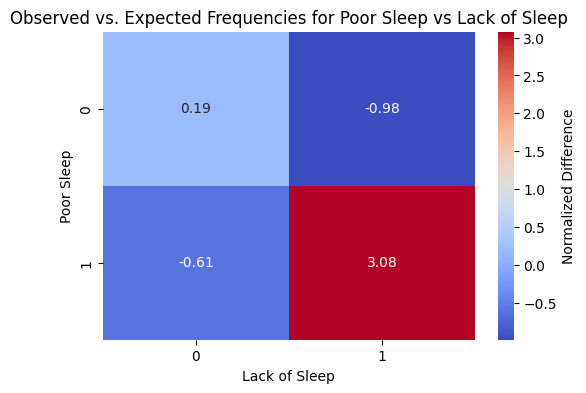

In [18]:
# for 'trigger_poor_sleep' vs 'trigger_lack_sleep'
contingency_sleep = pd.crosstab(df['trigger_poor_sleep'], df['trigger_lack_sleep'])

# Perform Chi-Square test
chi2_sleep, p_sleep, dof_sleep, expected_sleep = chi2_contingency(contingency_sleep)

# Convert observed and expected frequencies for comparison
observed_sleep = contingency_sleep.values
expected_sleep = np.array(expected_sleep)

# Calculate the difference between observed and expected frequencies
difference_sleep = observed_sleep - expected_sleep

# Normalize the difference
normalized_difference_sleep = difference_sleep / expected_sleep

difference_df = pd.DataFrame(normalized_difference_sleep, 
                             index=contingency_sleep.index, 
                             columns=contingency_sleep.columns)

# Visualize the differences as a heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(difference_df, annot=True, cmap="coolwarm", fmt=".2f", cbar_kws={'label': 'Normalized Difference'})
plt.title("Observed vs. Expected Frequencies for Poor Sleep vs Lack of Sleep")
plt.xlabel("Lack of Sleep")
plt.ylabel("Poor Sleep")
plt.show()


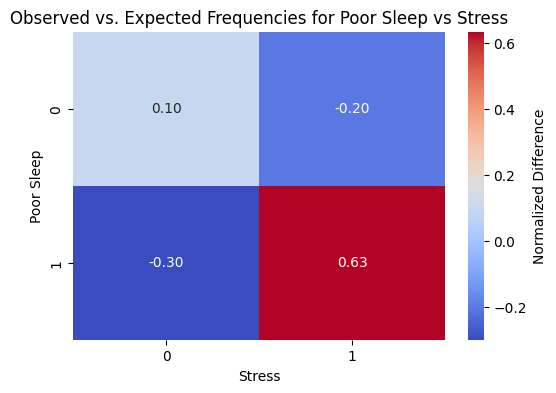

In [19]:
# for 'trigger_poor_sleep' vs 'trigger_stress'
contingency_sleep = pd.crosstab(df['trigger_poor_sleep'], df['trigger_stress'])

# Perform Chi-Square test
chi2_sleep, p_sleep, dof_sleep, expected_sleep = chi2_contingency(contingency_sleep)

# Convert observed and expected frequencies for comparison
observed_sleep = contingency_sleep.values
expected_sleep = np.array(expected_sleep)

# Calculate the difference between observed and expected frequencies
difference_sleep = observed_sleep - expected_sleep

# Normalize the difference
normalized_difference_sleep = difference_sleep / expected_sleep

difference_df = pd.DataFrame(normalized_difference_sleep, 
                             index=contingency_sleep.index, 
                             columns=contingency_sleep.columns)

# Visualize the differences as a heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(difference_df, annot=True, cmap="coolwarm", fmt=".2f", cbar_kws={'label': 'Normalized Difference'})
plt.title("Observed vs. Expected Frequencies for Poor Sleep vs Stress")
plt.xlabel("Stress")
plt.ylabel("Poor Sleep")
plt.show()


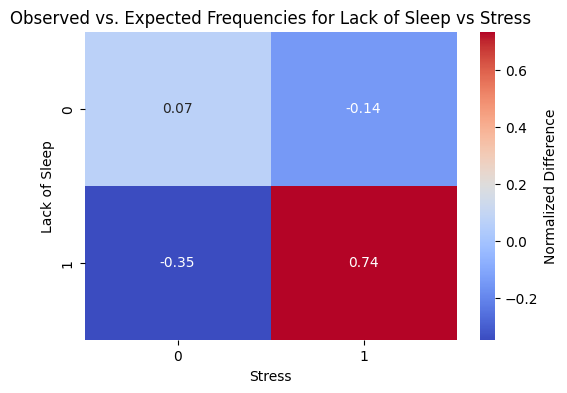

In [20]:
# for 'trigger_lack_sleep' vs 'trigger_stress'
contingency_sleep = pd.crosstab(df['trigger_lack_sleep'], df['trigger_stress'])

# Perform Chi-Square test
chi2_sleep, p_sleep, dof_sleep, expected_sleep = chi2_contingency(contingency_sleep)

# Convert observed and expected frequencies for comparison
observed_sleep = contingency_sleep.values
expected_sleep = np.array(expected_sleep)

# Calculate the difference between observed and expected frequencies
difference_sleep = observed_sleep - expected_sleep

# Normalize the difference
normalized_difference_sleep = difference_sleep / expected_sleep

difference_df = pd.DataFrame(normalized_difference_sleep, 
                             index=contingency_sleep.index, 
                             columns=contingency_sleep.columns)

# Visualize the differences as a heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(difference_df, annot=True, cmap="coolwarm", fmt=".2f", cbar_kws={'label': 'Normalized Difference'})
plt.title("Observed vs. Expected Frequencies for Lack of Sleep vs Stress")
plt.xlabel("Stress")
plt.ylabel("Lack of Sleep")
plt.show()


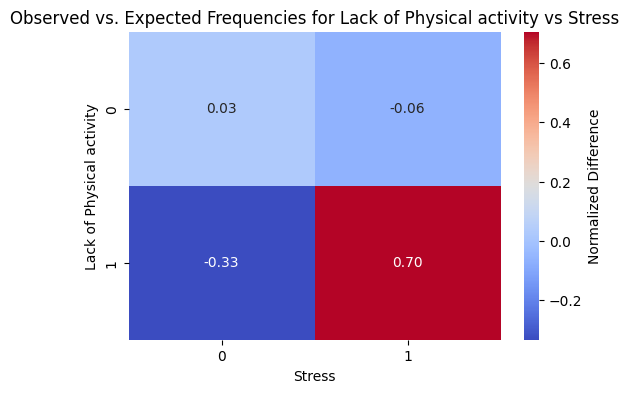

In [21]:
# for 'trigger_lack_of_physical_activity' vs 'trigger_stress'
contingency_sleep = pd.crosstab(df['trigger_lack_physical_activity'], df['trigger_stress'])

# Perform Chi-Square test
chi2_sleep, p_sleep, dof_sleep, expected_sleep = chi2_contingency(contingency_sleep)

# Convert observed and expected frequencies  for comparison
observed_sleep = contingency_sleep.values
expected_sleep = np.array(expected_sleep)

# Calculate the difference between observed and expected frequencies
difference_sleep = observed_sleep - expected_sleep

# Normalize the difference
normalized_difference_sleep = difference_sleep / expected_sleep

difference_df = pd.DataFrame(normalized_difference_sleep, 
                             index=contingency_sleep.index, 
                             columns=contingency_sleep.columns)

# Visualize the differences as a heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(difference_df, annot=True, cmap="coolwarm", fmt=".2f", cbar_kws={'label': 'Normalized Difference'})
plt.title("Observed vs. Expected Frequencies for Lack of Physical activity vs Stress")
plt.xlabel("Stress")
plt.ylabel("Lack of Physical activity")
plt.show()


In [22]:
def print_correlation_and_pvalues(correlation_matrix, pvalue_matrix, significance_level=0.05):
    print("Correlation Coefficients and P-values:")
    for i in range(correlation_matrix.shape[0]):
        for j in range(i+1, correlation_matrix.shape[1]):
            corr = correlation_matrix.iloc[i, j]
            pval = pvalue_matrix.iloc[i, j]
            if pval < significance_level:
                print(f"{correlation_matrix.columns[i]} vs {correlation_matrix.columns[j]}: "
                      f"Correlation = {corr:.3f}, p-value = {pval:.3e}")

# Function to calculate correlation matrix and p-values
def correlation_with_significance(df, method='pearson'):
    df_corr = pd.DataFrame(np.zeros((df.shape[1], df.shape[1])), columns=df.columns, index=df.columns)
    df_pval = pd.DataFrame(np.zeros((df.shape[1], df.shape[1])), columns=df.columns, index=df.columns)

    for i in range(df.shape[1]):
        for j in range(i, df.shape[1]):
            if method == 'pearson':
                corr, pval = pearsonr(df.iloc[:, i], df.iloc[:, j])
            elif method == 'spearman':
                corr, pval = spearmanr(df.iloc[:, i], df.iloc[:, j])
            df_corr.iloc[i, j] = df_corr.iloc[j, i] = corr
            df_pval.iloc[i, j] = df_pval.iloc[j, i] = pval

    return df_corr, df_pval


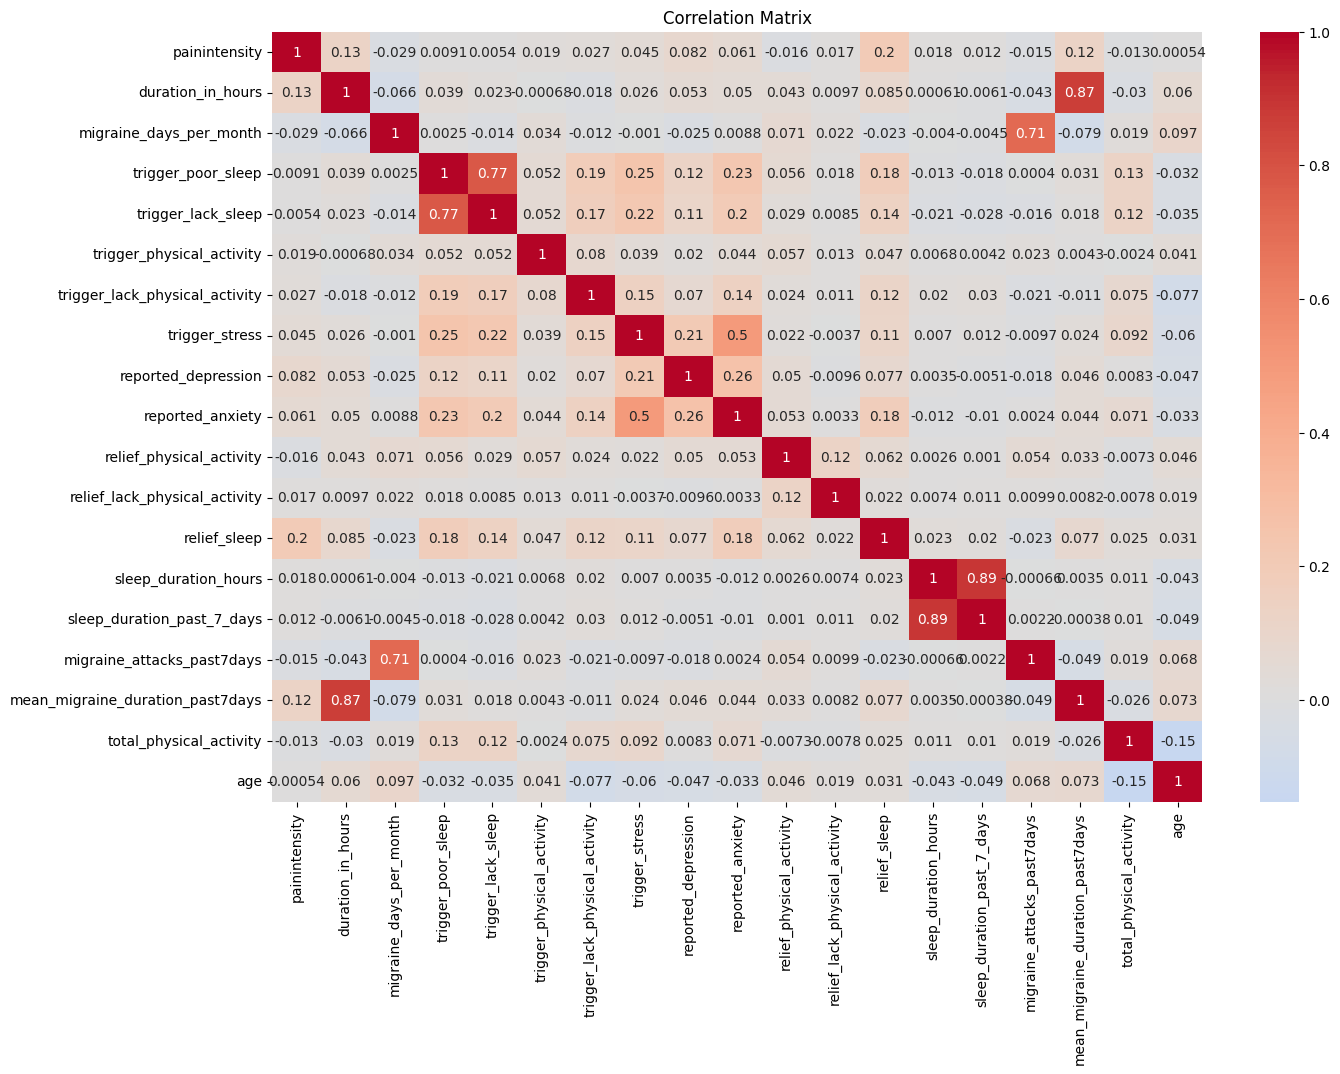

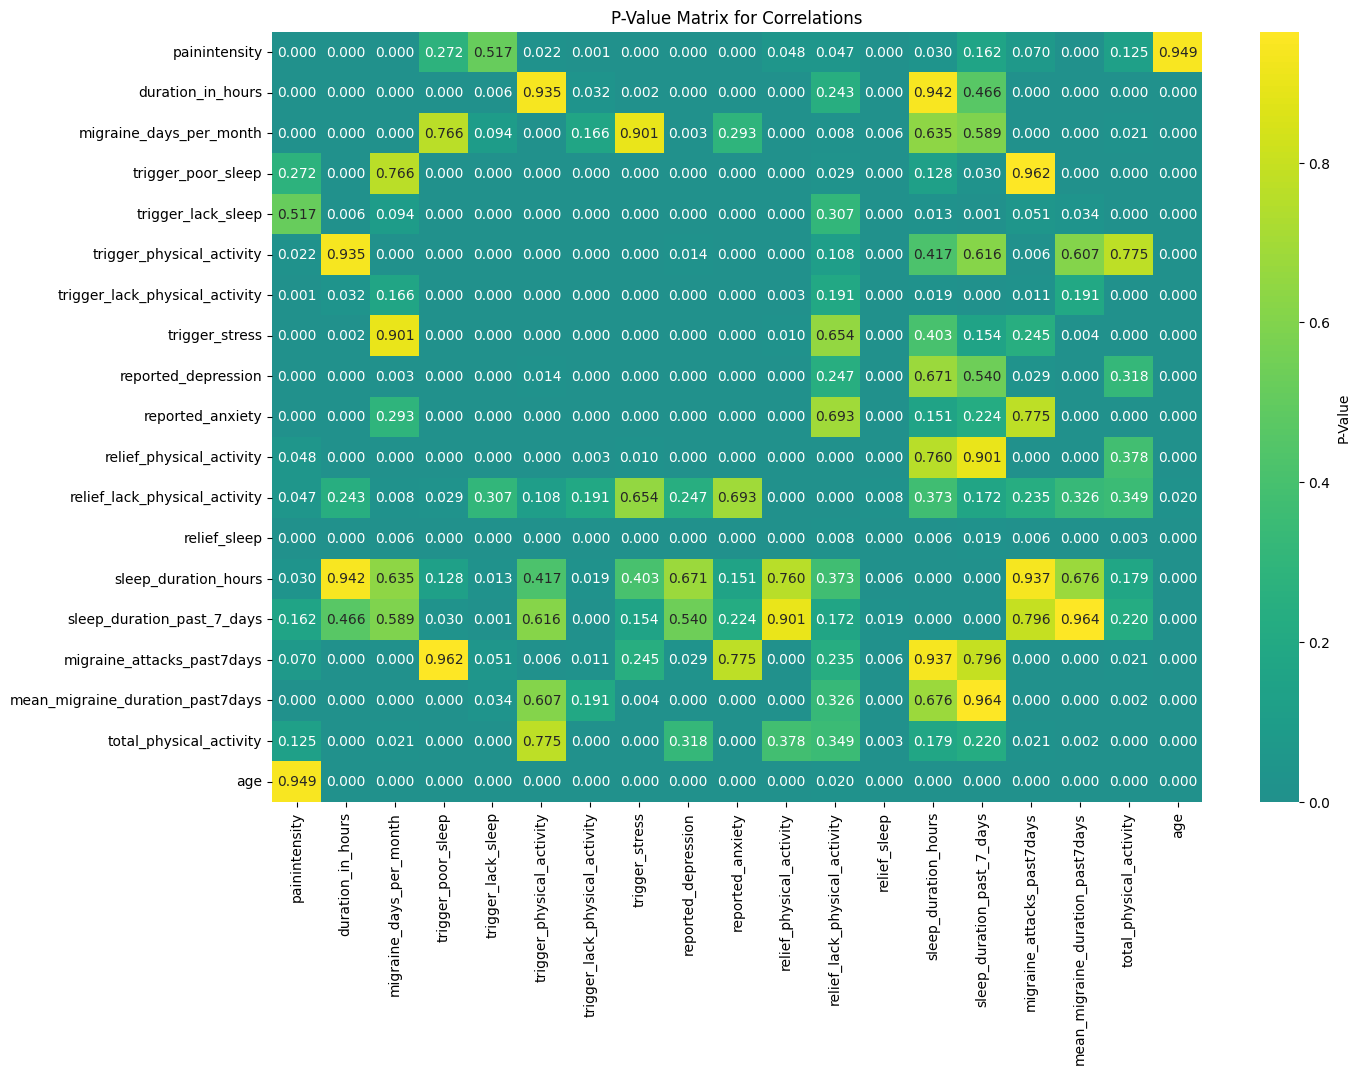

Correlation Coefficients and P-values:
painintensity vs duration_in_hours: Correlation = 0.126, p-value = 3.299e-52
painintensity vs migraine_days_per_month: Correlation = -0.029, p-value = 4.650e-04
painintensity vs trigger_physical_activity: Correlation = 0.019, p-value = 2.153e-02
painintensity vs trigger_lack_physical_activity: Correlation = 0.027, p-value = 1.304e-03
painintensity vs trigger_stress: Correlation = 0.045, p-value = 8.235e-08
painintensity vs reported_depression: Correlation = 0.082, p-value = 3.739e-23
painintensity vs reported_anxiety: Correlation = 0.061, p-value = 3.282e-13
painintensity vs relief_physical_activity: Correlation = -0.016, p-value = 4.835e-02
painintensity vs relief_lack_physical_activity: Correlation = 0.017, p-value = 4.712e-02
painintensity vs relief_sleep: Correlation = 0.203, p-value = 3.043e-133
painintensity vs sleep_duration_hours: Correlation = 0.018, p-value = 3.023e-02
painintensity vs mean_migraine_duration_past7days: Correlation = 0.12

In [29]:
# Pearson correlation matrix

df_subset = df[['painintensity', 'duration_in_hours', 'migraine_days_per_month', 'trigger_poor_sleep',
                          'trigger_lack_sleep', 'trigger_physical_activity', 'trigger_lack_physical_activity', 
                          'trigger_stress','reported_depression','reported_anxiety', 'relief_physical_activity', 'relief_lack_physical_activity', 
                          'relief_sleep','sleep_duration_hours', 'sleep_duration_past_7_days', 'migraine_attacks_past7days', 'mean_migraine_duration_past7days',
            'total_physical_activity','age']]


# correlation matrix and p-values
correlation_matrix, pvalue_matrix = correlation_with_significance(df_subset, method='pearson')

# Plot the correlation matrix
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix')
plt.show()

# Plot the p-value matrix
plt.figure(figsize=(15, 10))
sns.heatmap(pvalue_matrix, annot=True, cmap='viridis', center=0, fmt=".3f", cbar_kws={'label': 'P-Value'})
plt.title('P-Value Matrix for Correlations')
plt.show()

print_correlation_and_pvalues(correlation_matrix, pvalue_matrix)

In [25]:
# significant correlations between different sleep groups
def print_significant_correlations(df, significance_level=0.05):
    df_corr = pd.DataFrame(np.zeros((df.shape[1], df.shape[1])), columns=df.columns, index=df.columns)
    df_pval = pd.DataFrame(np.zeros((df.shape[1], df.shape[1])), columns=df.columns, index=df.columns)

    # Calculate correlations and p-values
    significant_pairs = []
    for i in range(df.shape[1]):
        for j in range(i+1, df.shape[1]): 
            corr, pval = pearsonr(df.iloc[:, i], df.iloc[:, j])
            if pval < significance_level:
                significant_pairs.append((df.columns[i], df.columns[j], corr, pval))

    if significant_pairs:
        print(f"Significant correlations (p < {significance_level}):")
        for var1, var2, corr, pval in significant_pairs:
            print(f"{var1} vs {var2}: Correlation = {corr:.3f}, p-value = {pval:.3e}")
    else:
        print(f"No significant correlations (p < {significance_level}) found.")

def analyze_by_group(df, group_column, group_value, variables):
    df_group = df[df[group_column] == group_value]  # Filter by the specific group
    df_group_subset = df_group[variables]  
    
    print(f"\nAnalyzing correlations for {group_column}: {group_value}")
    print_significant_correlations(df_group_subset)

variables_of_interest = ['painintensity', 'duration_in_hours', 'migraine_days_per_month', 'trigger_poor_sleep',
                         'trigger_lack_sleep', 'trigger_physical_activity', 'trigger_lack_physical_activity', 
                         'trigger_stress', 'relief_physical_activity', 'relief_lack_physical_activity', 
                         'relief_sleep','reported_anxiety', 'reported_depression']
# For the 'highly Active' group in 'activity_group'
analyze_by_group(df, 'activity_group', 'Highly Active', variables_of_interest)
# For the 'Active' group in 'activity_group'
analyze_by_group(df, 'activity_group', 'Active', variables_of_interest)
# For the 'sedentary' group in 'activity_group'
analyze_by_group(df, 'activity_group', 'Sedentary', variables_of_interest)
# For the 'Adequate Sleep' group in 'sleep_group'
analyze_by_group(df, 'sleep_group', 'Adequate Sleep', variables_of_interest)
# For the 'Short Sleep' group in 'sleep_group'
analyze_by_group(df, 'sleep_group', 'Short Sleep', variables_of_interest)
# For the 'excessive Sleep' group in 'sleep_group'
analyze_by_group(df, 'sleep_group', 'Excessive Sleep', variables_of_interest)


Analyzing correlations for activity_group: Highly Active
Significant correlations (p < 0.05):
painintensity vs migraine_days_per_month: Correlation = 0.914, p-value = 1.953e-06
painintensity vs trigger_stress: Correlation = -0.713, p-value = 2.824e-03
trigger_poor_sleep vs trigger_lack_sleep: Correlation = 1.000, p-value = 3.509e-101
trigger_poor_sleep vs trigger_lack_physical_activity: Correlation = 0.707, p-value = 3.198e-03
trigger_lack_sleep vs trigger_lack_physical_activity: Correlation = 0.707, p-value = 3.198e-03
trigger_lack_physical_activity vs reported_anxiety: Correlation = 0.535, p-value = 4.009e-02
trigger_stress vs reported_anxiety: Correlation = 0.764, p-value = 9.192e-04

Analyzing correlations for activity_group: Active
Significant correlations (p < 0.05):
painintensity vs migraine_days_per_month: Correlation = 0.247, p-value = 2.892e-03
painintensity vs relief_lack_physical_activity: Correlation = 0.201, p-value = 1.620e-02
painintensity vs relief_sleep: Correlation 

Significant correlations (p < 0.05):
painintensity vs duration_in_hours: Correlation = 0.127, p-value = 1.800e-52
painintensity vs migraine_days_per_month: Correlation = -0.034, p-value = 5.125e-05
painintensity vs trigger_physical_activity: Correlation = 0.019, p-value = 2.108e-02
painintensity vs trigger_lack_physical_activity: Correlation = 0.027, p-value = 1.180e-03
painintensity vs trigger_stress: Correlation = 0.046, p-value = 3.287e-08
painintensity vs relief_physical_activity: Correlation = -0.018, p-value = 3.147e-02
painintensity vs relief_sleep: Correlation = 0.203, p-value = 2.053e-132
painintensity vs reported_anxiety: Correlation = 0.061, p-value = 3.949e-13
painintensity vs reported_depression: Correlation = 0.084, p-value = 1.299e-23
duration_in_hours vs migraine_days_per_month: Correlation = -0.065, p-value = 7.235e-15
duration_in_hours vs trigger_poor_sleep: Correlation = 0.043, p-value = 2.309e-07
duration_in_hours vs trigger_lack_sleep: Correlation = 0.027, p-value 

/tmp/ipykernel_16948/3360125209.py:10: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  corr, pval = pearsonr(df.iloc[:, i], df.iloc[:, j])
/tmp/ipykernel_16948/3360125209.py:10: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  corr, pval = pearsonr(df.iloc[:, i], df.iloc[:, j])



Analyzing correlations for sleep_group: Short Sleep
Significant correlations (p < 0.05):
painintensity vs duration_in_hours: Correlation = 0.131, p-value = 1.130e-19
painintensity vs migraine_days_per_month: Correlation = -0.030, p-value = 4.111e-02
painintensity vs trigger_lack_physical_activity: Correlation = 0.051, p-value = 5.015e-04
painintensity vs trigger_stress: Correlation = 0.059, p-value = 4.780e-05
painintensity vs relief_physical_activity: Correlation = -0.038, p-value = 8.844e-03
painintensity vs relief_sleep: Correlation = 0.200, p-value = 4.814e-44
painintensity vs reported_anxiety: Correlation = 0.067, p-value = 3.521e-06
painintensity vs reported_depression: Correlation = 0.086, p-value = 2.553e-09
duration_in_hours vs migraine_days_per_month: Correlation = -0.050, p-value = 6.235e-04
duration_in_hours vs trigger_poor_sleep: Correlation = 0.042, p-value = 3.481e-03
duration_in_hours vs trigger_lack_sleep: Correlation = 0.030, p-value = 3.878e-02
duration_in_hours vs 